In [11]:
from keras.models import model_from_yaml
import os

yaml_file = open('Model/product_classifier_vgg16_model.yaml', 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()
vgg16 = model_from_yaml(loaded_model_yaml)
vgg16.load_weights("Model/product_classifier_vgg16.h5")

yaml_file = open('Model/product_classifier_model.yaml', 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()
classification_model = model_from_yaml(loaded_model_yaml)
classification_model.load_weights("Model/product_classifier_model.h5")

C:\Users\Xavi\Anaconda3\envs\TFM\lib\site-packages\keras\engine\saving.py:473: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(yaml_string)


In [12]:
#Test
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

datagen = ImageDataGenerator()
generator  = datagen.flow_from_directory('Data/GeneralProductClassifier/train/')
img_width, img_height = 256, 256
class_labels = list(generator.class_indices.keys())

def predict(image_path):
    img = image.load_img(image_path, target_size=(img_width, img_height))
    image_array = image.img_to_array(img)
    plt.imshow(image_array/img_width)
    y = image.img_to_array(img)
    y = np.expand_dims(y, axis=0)
    images = np.vstack([y])
    bottleneck_output = vgg16.predict(images)
    prediction = classification_model.predict(bottleneck_output) 
    return prediction

def print_prediction(prediction):
    predicted_classes = prediction.argmax(axis=-1)
    print("Predicted: " + class_labels[predicted_classes[0]])
    # Show top 3 classes
    sorting = (-prediction).argsort()
    sorted_ = sorting[0][:3]

Found 2119 images belonging to 12 classes.


Predicted: usb-flash-drives


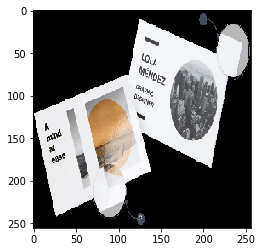

In [13]:
prediction = predict("Data/GeneralProductClassifier/Competitors_tests/moo_business-card2.png")
print_prediction(prediction)

Predicted: door-hanger


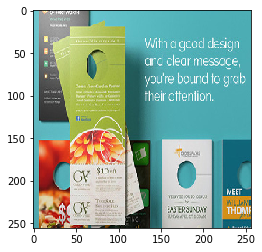

In [14]:
prediction = predict("Data/GeneralProductClassifier/Competitors_tests/printplace_door_hanger.jpg")
print_prediction(prediction)

Predicted: mugs


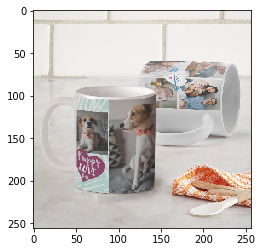

In [15]:
prediction = predict("Data/GeneralProductClassifier/Competitors_tests/snapfish_mug.jpg")
print_prediction(prediction)

Predicted: table-covers


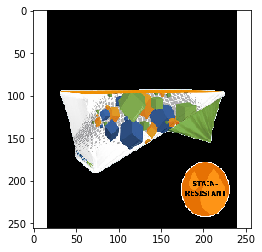

In [16]:
prediction = predict("Data/GeneralProductClassifier/Competitors_tests/vispronet_table-cover.png")
print_prediction(prediction)

Predicted: table-covers


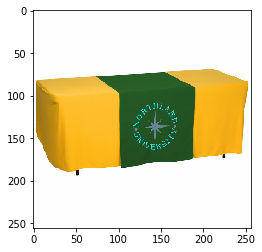

In [17]:
prediction = predict("Data/GeneralProductClassifier/Competitors_tests/table-cover.jpg")
print_prediction(prediction)

Predicted: banners


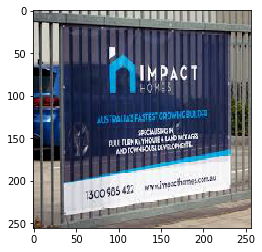

In [18]:
prediction = predict("Data/GeneralProductClassifier/Competitors_tests/mesh_banner.jpeg")
print_prediction(prediction)

Predicted: business-card


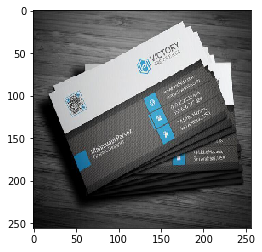

In [19]:
prediction = predict("Data/GeneralProductClassifier/Competitors_tests/business_card.jpg")
print_prediction(prediction)